In [9]:
import datetime as dt
from keras.applications.vgg16 import VGG16

from utils import get_image_paths
from gram_matrices import gram_matrix, build_gram_lib, gen_images_embeddings, calc_layer_sum_sq, get_concatenated_images, query_gram_lib, plot_results, save_gram_lib, load_gram_lib

In [2]:
# set query parameters
lib_name = 'test_1'
query_idx = 0
n_results = 4

In [3]:
# load model
model = VGG16(weights='imagenet', include_top=True)

In [4]:
image_paths = get_image_paths('../data/test')
images_embeddings, layer_list, file_mapping = gen_images_embeddings(image_paths, model)

keeping 14 image_paths to analyze


In [6]:
gram_lib = build_gram_lib(images_embeddings, layer_list)
save_gram_lib(lib_name, gram_lib, file_mapping)

In [7]:
file_index, gram_lib = load_gram_lib(lib_name)

In [14]:
query_gram_dict = {layer_name: gram_stack[query_idx, :] for layer_name, gram_stack in gram_lib.items()}

start = dt.datetime.now()
results_indices = query_gram_lib(query_gram_dict, gram_lib, layer_list)
end = dt.datetime.now()
t_per_image = (end - start).microseconds / len(image_paths) / 1000
print(f'{t_per_image} milliseconds per image')

6.765071428571429 milliseconds per image


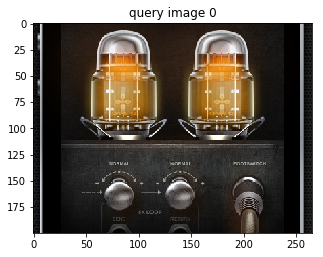

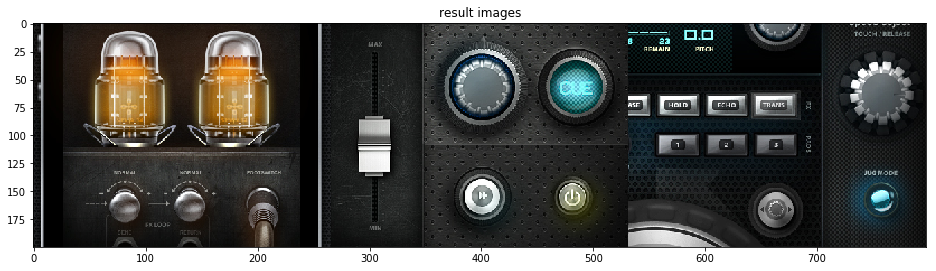

In [15]:
plot_results(query_idx, results_indices, file_index)